#Dataset :https://www.kaggle.com/c/titanic/data

#Data Dictionary

survival	Survival	0 = No, 1 = Yes

pclass	Ticket class	1 = 1st, 2 = 2nd, 3 = 3rd

sex	Sex

Age	Age in years

sibsp	# of siblings / spouses aboard the Titanic

parch	# of parents / children aboard the Titanic

ticket	Ticket number

fare	Passenger fare

cabin	Cabin number

embarked	Port of Embarkation	C = Cherbourg,
 Q = Queenstown, S = Southampton

#Variable Notes

pclass: A proxy for socio-economic status (SES)
1st = Upper
2nd = Middle
3rd = Lower

age: Age is fractional if less than 1. If the age is estimated, is it in the form of xx.5

sibsp: The dataset defines family relations in this way...

Sibling = brother, sister, stepbrother, stepsister

Spouse = husband, wife (mistresses and fiancés were ignored)

parch: The dataset defines family relations in this way...

Parent = mother, father

Child = daughter, son, stepdaughter, stepson

Some children travelled only with a nanny, therefore parch=0 for them.

#Call The Data

In [ ]:
import pandas as pd
import numpy as np
import matplotlib.pyplot as plt
import seaborn as sns

In [ ]:
df=pd.read_csv('/content/train.csv')

In [ ]:
df.head()

,PassengerId,Survived,Pclass,Name,Sex,Age,SibSp,Parch,Ticket,Fare,Cabin,Embarked
0,1,0,3,"Braund, Mr. Owen Harris",male,22.0,1,0,A/5 21171,7.2500,NaN,S
1,2,1,1,"Cumings, Mrs. John Bradley (Florence Briggs Th...",female,38.0,1,0,PC 17599,71.2833,C85,C
2,3,1,3,"Heikkinen, Miss. Laina",female,26.0,0,0,STON/O2. 3101282,7.9250,NaN,S
3,4,1,1,"Futrelle, Mrs. Jacques Heath (Lily May Peel)",female,35.0,1,0,113803,53.1000,C123,S
4,5,0,3,"Allen, Mr. William Henry",male,35.0,0,0,373450,8.0500,NaN,S


#Data exploration

In [ ]:
df.info()

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 891 entries, 0 to 890
Data columns (total 12 columns):
 #   Column       Non-Null Count  Dtype  
---  ------       --------------  -----  
 0   PassengerId  891 non-null    int64  
 1   Survived     891 non-null    int64  
 2   Pclass       891 non-null    int64  
 3   Name         891 non-null    object 
 4   Sex          891 non-null    object 
 5   Age          714 non-null    float64
 6   SibSp        891 non-null    int64  
 7   Parch        891 non-null    int64  
 8   Ticket       891 non-null    object 
 9   Fare         891 non-null    float64
 10  Cabin        204 non-null    object 
 11  Embarked     889 non-null    object 
dtypes: float64(2), int64(5), object(5)
memory usage: 83.7+ KB


In [ ]:
df.isnull().sum()

PassengerId      0
Survived         0
Pclass           0
Name             0
Sex              0
Age            177
SibSp            0
Parch            0
Ticket           0
Fare             0
Cabin          687
Embarked         2
dtype: int64

In [ ]:
df['Age'].mean()

29.69911764705882

In [ ]:
df['Age'].fillna(df['Age']==30,inplace=True)

In [ ]:
df.drop(columns=['Cabin'],inplace=True)

In [ ]:
df['Age'] = df['Age'].astype(int)

In [ ]:
df.describe()

,PassengerId,Survived,Pclass,Age,SibSp,Parch,Fare
count,891.000000,891.000000,891.000000,891.000000,891.000000,891.000000,891.000000
mean,446.000000,0.383838,2.308642,23.783389,0.523008,0.381594,32.204208
std,257.353842,0.486592,0.836071,17.597344,1.102743,0.806057,49.693429
min,1.000000,0.000000,1.000000,0.000000,0.000000,0.000000,0.000000
25%,223.500000,0.000000,2.000000,6.000000,0.000000,0.000000,7.910400
50%,446.000000,0.000000,3.000000,24.000000,0.000000,0.000000,14.454200
75%,668.500000,1.000000,3.000000,35.000000,1.000000,0.000000,31.000000
max,891.000000,1.000000,3.000000,80.000000,8.000000,6.000000,512.329200


In [ ]:
df['Embarked'].unique()

In [ ]:
df['Embarked'].fillna('S', inplace=True)

In [ ]:
df['Embarked'].unique()

array(['S', 'C', 'Q'], dtype=object)

In [ ]:
df.isnull().sum()

PassengerId    0
Survived       0
Pclass         0
Name           0
Sex            0
Age            0
SibSp          0
Parch          0
Ticket         0
Fare           0
Embarked       0
dtype: int64

In [ ]:
#df['Sex'] = df['Sex'].map({'female': 0, 'male': 1})

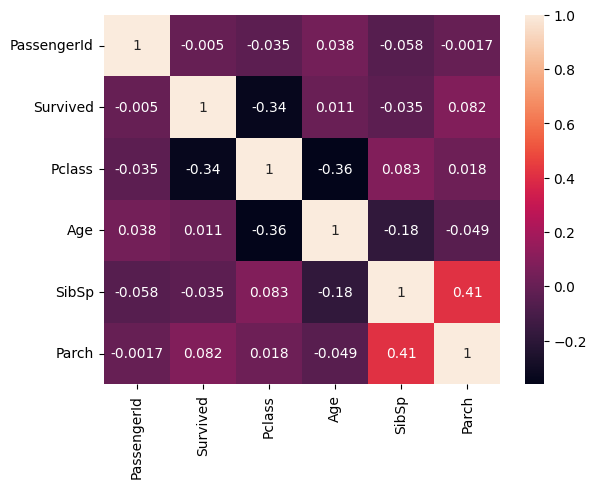

In [ ]:
numerical_df = df[['PassengerId','Survived','Pclass', 'Age', 'SibSp', 'Parch']]

sns.heatmap(numerical_df.corr(), annot=True)
plt.show()

In [ ]:
bins=[-1,1,12,18,30,50,100]
labels=['infant','child','teenager','young adult','adult','old']
df['Age Stages']=pd.cut(df['Age'],bins=bins,labels=labels)

In [ ]:
df.head()

,PassengerId,Survived,Pclass,Name,Sex,Age,SibSp,Parch,Ticket,Fare,Embarked,Age Stages
0,1,0,3,"Braund, Mr. Owen Harris",male,22,1,0,A/5 21171,7.2500,S,young adult
1,2,1,1,"Cumings, Mrs. John Bradley (Florence Briggs Th...",female,38,1,0,PC 17599,71.2833,C,adult
2,3,1,3,"Heikkinen, Miss. Laina",female,26,0,0,STON/O2. 3101282,7.9250,S,young adult
3,4,1,1,"Futrelle, Mrs. Jacques Heath (Lily May Peel)",female,35,1,0,113803,53.1000,S,adult
4,5,0,3,"Allen, Mr. William Henry",male,35,0,0,373450,8.0500,S,adult


#Insights From Data

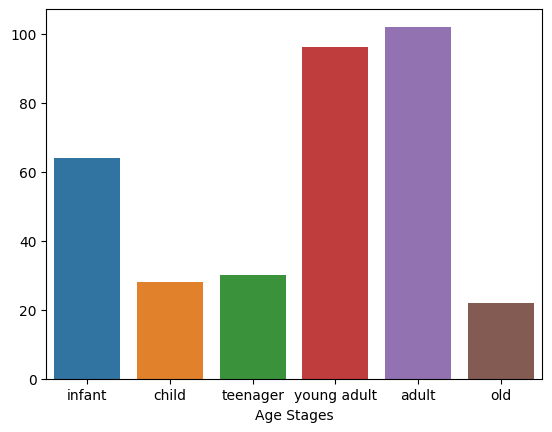

In [ ]:
a=df['Survived']==1
sur=df[a].groupby('Age Stages').size().sort_values(ascending=False)
sns.barplot(x=sur.index,y=sur.values,hue=sur.index)
plt.show()

From Age Stages we can conclude that adult survived more than others.

In [ ]:
alives= df['Survived']==1
lives=df[alives].groupby('Sex').size().sort_values(ascending=False)
lives

Sex
female    233
male      109
dtype: int64

In [ ]:
Deaths = df['Survived'] == 0
deaths = df[Deaths].groupby('Sex').size().sort_values(ascending=False)
deaths

Sex
male      468
female     81
dtype: int64

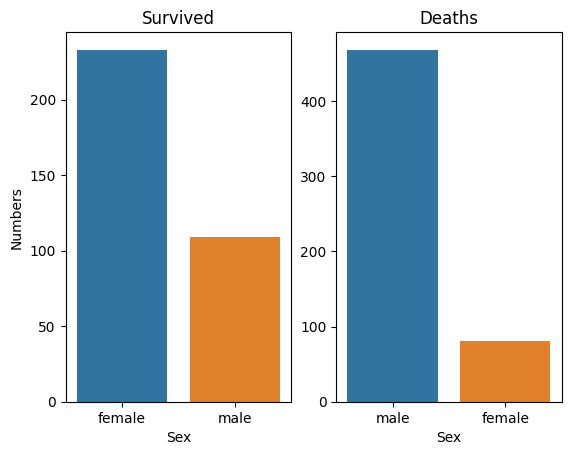

In [ ]:
plt.subplot(1,2,1)
sns.barplot(x=lives.index,y=lives.values,hue=lives.index)
plt.xlabel('Sex')
plt.ylabel('Numbers')
plt.title('Survived')

plt.subplot(1,2,2)
sns.barplot(x=deaths.index,y=deaths.values,hue=deaths.index)
plt.xlabel('Sex')
plt.title('Deaths')
plt.show()

From this data we have made that conlclusion that female survived more than male survived in the ship.

From Age Stages we can conclude that adult survived more than others.

<Axes: xlabel='Survived', ylabel='Fare'>

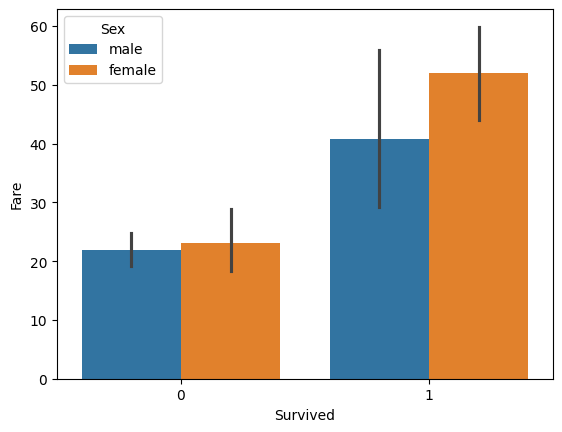

In [ ]:
sns.barplot(x='Survived',y='Fare',data=df,hue='Sex')

passengers who paid higher fares were more likely to survive. This is indicated by the higher average fare for survivors compared to non-survivors.


In [ ]:
df['Embarked'].unique()

array(['S', 'C', 'Q', 'nan'], dtype=object)

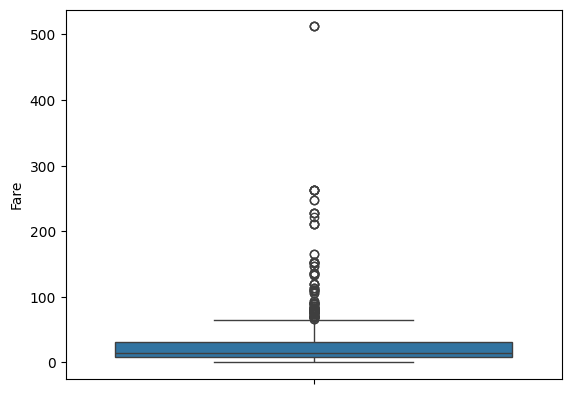

In [ ]:
sns.boxplot(df['Fare'])
plt.show()

In [ ]:
q1=df['Fare'].quantile(0.25)
q2=df['Fare'].quantile(0.50)
q3=df['Fare'].quantile(0.75)
iqr=q3-q1
upper_limit=q3+1.5*iqr
lower_limit=q1-1.5*iqr
df['Fare']=np.where(df['Fare']>upper_limit,upper_limit,np.where(df['Fare']<lower_limit,lower_limit,df['Fare']))

<Axes: xlabel='Embarked', ylabel='Fare'>

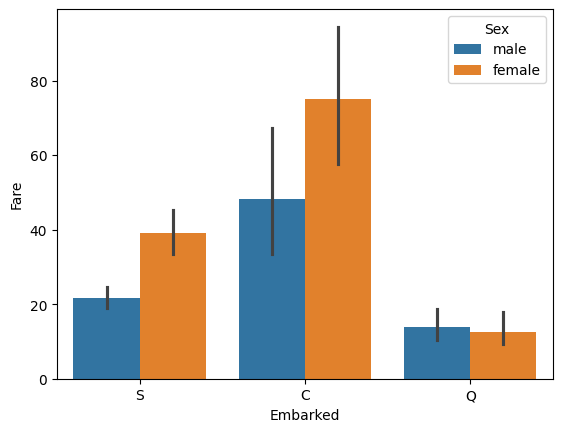

In [ ]:
sns.barplot(x='Embarked',y='Fare',data=df,hue='Sex')

 the port of embarkation had a significant impact on the fares paid, with Cherbourg passengers paying the highest fares on average

<Axes: xlabel='Pclass', ylabel='Fare'>

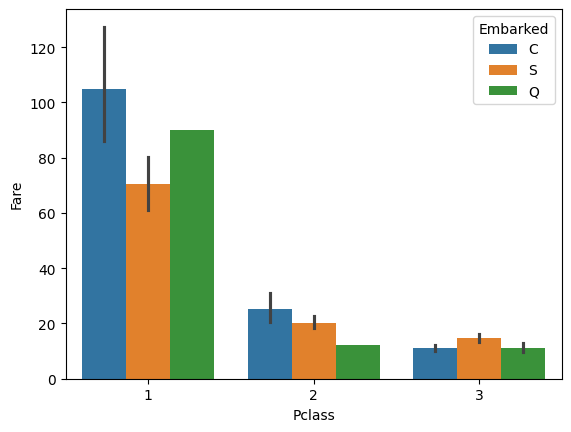

In [ ]:
sns.barplot(x='Pclass',y='Fare',data=df,hue='Embarked')

**First Class (Pclass 1):**
Passengers who embarked from Cherbourg (C) paid the highest fares on average, with a significant variation indicated by the error bars.
Passengers from Queenstown (Q) paid the next highest fares.
Passengers from Southampton (S) paid the lowest fares among first-class passengers.

**Second Class (Pclass 2):**
Passengers from Cherbourg (C) paid the highest fares.
Passengers from Southampton (S) and Queenstown (Q) paid lower and relatively similar fares, with Queenstown having slightly lower fares on average.

**Third Class (Pclass 3):**
Fares are quite uniform across all ports of embarkation, with minor differences. Cherbourg (C) passengers paid slightly higher fares compared to those from Southampton (S) and Queenstown (Q).

In [ ]:
sibsp= df['SibSp']==1
yes=df[sibsp].groupby('Sex').size().sort_values(ascending=False)
yes

Sex
female    106
male      103
dtype: int64

In [ ]:
sibsp= df['SibSp']==0
no=df[sibsp].groupby('Sex').size().sort_values(ascending=False)
no

Sex
male      434
female    174
dtype: int64

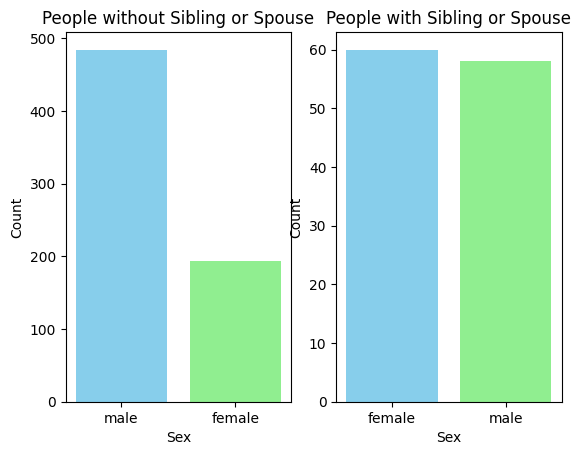

In [ ]:
plt.subplot(1,2,1)
plt.bar(no.index,no.values, color=['skyblue', 'lightgreen'])
plt.xlabel('Sex')
plt.ylabel('Count')
plt.title('People without Sibling or Spouse')

plt.subplot(1,2,2)
plt.bar(yes.index,yes.values, color=['skyblue', 'lightgreen'])
plt.xlabel('Sex')
plt.ylabel('Count')
plt.title('People with Sibling or Spouse')
plt.show()


Males were more likely to travel alone compared to females.

Females had a higher tendency to travel with family members or companions.

In [ ]:
Parch= df['Parch']==1
yes_Parch=df[Parch].groupby('Sex').size().sort_values(ascending=False)
yes_Parch

Sex
female    60
male      58
dtype: int64

In [ ]:
Parch= df['Parch']==0
no_Parch=df[Parch].groupby('Sex').size().sort_values(ascending=False)
no_Parch

Sex
male      484
female    194
dtype: int64

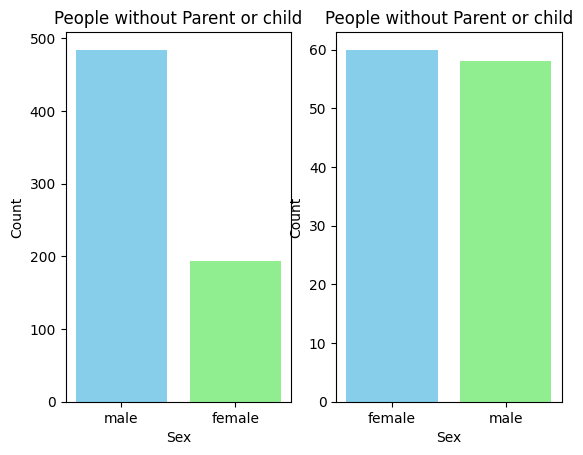

In [ ]:
plt.subplot(1,2,1)
plt.bar(no_Parch.index,no_Parch.values, color=['skyblue', 'lightgreen'])
plt.xlabel('Sex')
plt.ylabel('Count')
plt.title('People without Parent or child')

plt.subplot(1,2,2)
plt.bar(yes_Parch.index,yes_Parch.values, color=['skyblue', 'lightgreen'])
plt.xlabel('Sex')
plt.ylabel('Count')
plt.title('People without Parent or child')
plt.show()

Males are more likely to travel without a parent or child compared to females, as seen in the left plot where the count of males is significantly higher.

The numbers are more balanced between males and females when considering people without a parent or child in a different context or subset, as shown in the right plot.